In [1]:
import xarray as xr
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LogNorm
import warnings
from sklearn.metrics import mean_absolute_error
import matplotlib as mpl

pd.set_option('display.max_columns', None)
# Suppress all warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import seaborn as sns

from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, BboxTransformTo
from matplotlib.transforms import Bbox
from glob import glob

from rasterio.enums import Resampling
import rioxarray as rio

In [17]:
with open('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/testing_output/predictions_s1_xg.p', 'rb') as fp:
   data = pickle.load(fp) 
    
data.loc[((data.sc_percum<0.25)), 'prediction_label']=0
data.loc[data.prediction_label<0, 'prediction_label']=0
data= data[(data.sd_insitu>0)]

datax= data[(data.sd_insitu>0.25)]
re_hans = np.abs((datax.sd_insitu - datax.sd_hans)/datax.sd_insitu).mean()
re_ml = np.abs((datax.sd_insitu - datax.prediction_label)/datax.sd_insitu).mean()

In [22]:
np.abs(data.sd_insitu - data.sd_hans).mean()

0.37176657

In [10]:
xx = data[data.sd_insitu >3]

In [12]:
(xx.prediction_label - xx.sd_insitu).mean()

-1.7468266

In [12]:
#Snow depth
re_ml_sd, re_hans_sd, n_sd, re_ml_sd_sd, re_hans_sd_sd = list(), list(), list(), list(), list()
cr_sd, vv_sd, el_sd, sc_sd, snowclass_sd = list(), list(), list(), list(), list()

dvar = 0.25
x = np.arange(0,6.5,dvar)

for smin in x:
    smax = smin+dvar
    data_x = data[(data.sd_insitu>=smin)& (data.sd_insitu<smax)]
    re_ml_sd.append((np.abs(data_x.sd_insitu - data_x.prediction_label)).mean())
    re_hans_sd.append((np.abs(data_x.sd_insitu - data_x.sd_hans)).mean())
    re_ml_sd_sd.append((np.abs(data_x.sd_insitu - data_x.prediction_label)).std())
    re_hans_sd_sd.append((np.abs(data_x.sd_insitu - data_x.sd_hans)).std())
    n_sd.append(len(data_x))


re_ml_sd = np.asarray(re_ml_sd)
re_hans_sd = np.asarray(re_hans_sd)
re_ml_sd_sd = np.asarray(re_ml_sd_sd)
re_hans_sd_sd = np.asarray(re_hans_sd_sd)
n_sd = np.asarray(n_sd)

In [9]:
#Snow depth
re_ml_sd, re_hans_sd, n_sd, re_ml_sd_sd, re_hans_sd_sd = list(), list(), list(), list(), list()
cr_sd, vv_sd, el_sd, sc_sd, snowclass_sd = list(), list(), list(), list(), list()

dvar = 0.25
x = np.arange(0.25,6.5,dvar)

for smin in x:
    smax = smin+dvar
    data_x = data[(data.sd_insitu>=smin)& (data.sd_insitu<smax)]
    re_ml_sd.append((np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu).mean())
    re_hans_sd.append((np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu).mean())
    re_ml_sd_sd.append((np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu).std())
    re_hans_sd_sd.append((np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu).std())
    n_sd.append(len(data_x))


re_ml_sd = np.asarray(re_ml_sd)
re_hans_sd = np.asarray(re_hans_sd)
re_ml_sd_sd = np.asarray(re_ml_sd_sd)
re_hans_sd_sd = np.asarray(re_hans_sd_sd)
n_sd = np.asarray(n_sd)

In [58]:
#FCF
data2 = data[(data.sd_insitu>0.25)]
re_ml_fcf, re_hans_fcf, n_fcf, re_ml_fcf_sd, re_hans_fcf_sd = list(), list(), list(), list(), list()

dvar = 10
x = np.arange(0,101,dvar)

for smin in x:
    smax = smin+dvar
    data_x = data2[(data2.fcf>=smin)& (data2.fcf<smax)]
    re_ml_fcf.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu))
    re_hans_fcf.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu))
    re_ml_fcf_sd.append(np.nanstd(np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu))
    re_hans_fcf_sd.append(np.nanstd(np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu))
    n_fcf.append(len(data_x))

re_ml_fcf = np.asarray(re_ml_fcf)
re_hans_fcf = np.asarray(re_hans_fcf)
re_ml_fcf_sd = np.asarray(re_ml_fcf_sd)
re_hans_fcf_sd = np.asarray(re_hans_fcf_sd)

re_hans2 = np.abs((data2.sd_insitu - data2.sd_hans)/data2.sd_insitu).mean()
re_ml2 = np.abs((data2.sd_insitu - data2.prediction_label)/data2.sd_insitu).mean()

In [59]:
#LIA
re_ml_lia, re_hans_lia, n_lia = list(), list(), list()

dvar = 5
x = np.arange(5,75,dvar)

for smin in x:
    smax = smin+dvar
    data_x = data2[(data2.lia>=smin)& (data2.lia<smax)]
    re_ml_lia.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu))
    re_hans_lia.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu))
    n_lia.append(len(data_x))

re_ml_lia = np.asarray(re_ml_lia)
re_hans_lia = np.asarray(re_hans_lia)

In [60]:
#Snowclass
re_ml_sc, re_hans_sc, n_sc = list(), list(), list()

for sc in [1,2,3,4,5,6,7]:
    data_x = data2[data2.snowclass==sc]
    re_ml_sc.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.prediction_label)/data_x.sd_insitu))
    re_hans_sc.append(np.nanmean(np.abs(data_x.sd_insitu - data_x.sd_hans)/data_x.sd_insitu))
    n_sc.append(len(data_x))

re_ml_sc = np.asarray(re_ml_sc)
re_hans_sc = np.asarray(re_hans_sc)

Text(0, 0.5, 'Absolute Error (m)')

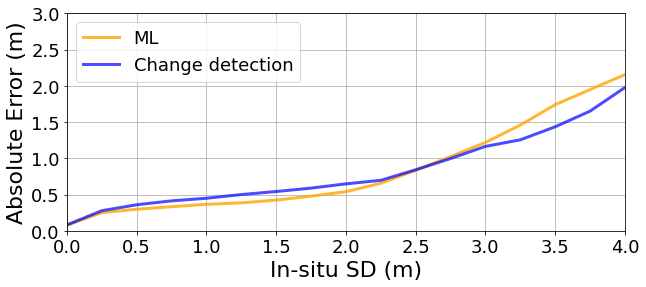

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,4))

ax.plot(np.arange(0,6.5,0.25), re_ml_sd, color = 'orange',alpha = 0.8, linewidth = 3, label = 'ML')
ax.plot(np.arange(0,6.5,0.25), re_hans_sd, color = 'blue',alpha = 0.7, linewidth = 3, label = 'Change detection')
ax.set_ylim([0,3])
ax.set_xlim([0,4])
#ax.set_yticks([20,40,60,80])
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('In-situ SD (m)', fontsize = 22)
ax.legend(fontsize = 18, loc = 'upper left')
#ax.plot([0,6.25], [re_ml*100, re_ml*100], '--', color = 'orange',alpha = 0.7)
#ax.plot([0,6.25], [re_hans*100, re_hans*100], '--', color = 'blue',alpha = 0.6)
ax.grid()
ax.set_ylabel('Absolute Error (m)', fontsize = 22)
#plt.savefig('panels/sd_bin.png', dpi = 300, bbox_inches = 'tight')

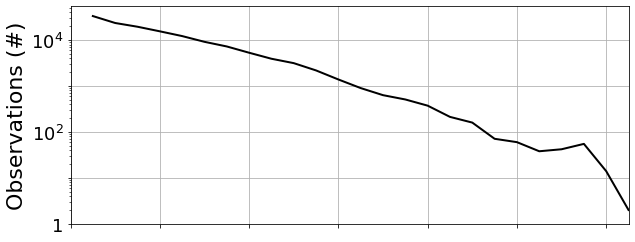

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(np.arange(0.25,6.5,0.25), n_sd, 'k', linewidth = 2, label = '# Obs.')
ax.set_yscale('log')
ax.set_yticks([1,10,100,1000,10000])
ax.set_yticklabels([1,'','$10^2$','','$10^4$'])
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels([]);
ax.set_xlim([0,6.25])
ax.grid()
ax.set_ylabel('Observations (#)', fontsize = 22)
plt.savefig('panels/sd_n.png', dpi = 300, bbox_inches = 'tight')

In [48]:
print(len(data[(data.sd_insitu>1)&(data.sd_insitu<3)])/len(data))
data13 = data[(data.sd_insitu>1)&(data.sd_insitu<3)]

print('CDA:', np.abs((data13.sd_insitu - data13.sd_hans)/data13.sd_insitu).mean())
print('ML: ', np.abs((data13.sd_insitu - data13.prediction_label)/data13.sd_insitu).mean())
print('CDA:', np.abs((data13.sd_insitu - data13.sd_hans)).mean())
print('ML: ', np.abs((data13.sd_insitu - data13.prediction_label)).mean())

0.28361179515105367
CDA: 0.3512363
ML:  0.28952456
CDA: 0.5677436
ML:  0.4772504


In [49]:
print(len(data[(data.sd_insitu<1)])/len(data))
data_below1 = data[(data.sd_insitu<1)]

print('CDA:', np.abs((data_below1.sd_insitu - data_below1.sd_hans)).mean())
print('ML: ', np.abs((data_below1.sd_insitu - data_below1.prediction_label)).mean())

0.6948662467652006
CDA: 0.25392282
ML:  0.22751962


In [50]:
print(len(data[(data.sd_insitu>3)])/len(data))
data_above3 = data[(data.sd_insitu>3)]

print('CDA:', np.abs((data_above3.sd_insitu - data_above3.sd_hans)).mean())
print('ML: ', np.abs((data_above3.sd_insitu - data_above3.prediction_label)).mean())

0.021521958083745765
CDA: 1.543634
ML:  1.7472144


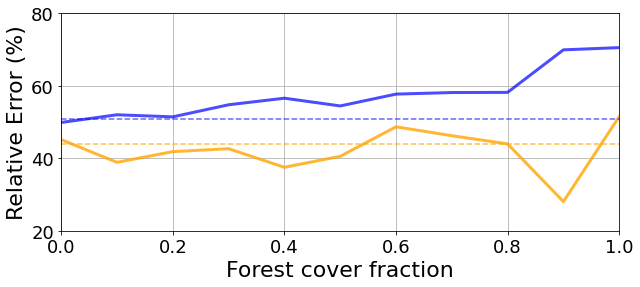

In [61]:
fig, ax = plt.subplots(1,1, figsize = (10,4))

ax.plot(np.arange(0,1.1,0.1), re_ml_fcf*100, color = 'orange',alpha = 0.8, linewidth = 3, label = 'ML')
ax.plot(np.arange(0,1.1,0.1), re_hans_fcf*100, color = 'blue',alpha = 0.7, linewidth = 3, label = 'Empirical')
ax.set_ylim([20,80])
ax.set_xlim([0,1])
ax.set_yticks([20,40,60,80])
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('Forest cover fraction', fontsize = 22)
ax.plot([0,6.25], [re_ml, re_ml], '--', color = 'orange',alpha = 0.7)
ax.plot([0,6.25], [re_hans, re_hans], '--', color = 'blue',alpha = 0.6)
ax.grid()
ax.set_ylabel('Relative Error (%)', fontsize = 22)
ax.plot([0,100], [100*re_ml2, 100*re_ml2], '--', color = 'orange',alpha = 0.7)
ax.plot([0,100], [100*re_hans2, 100*re_hans2], '--', color = 'blue',alpha = 0.6)
plt.savefig('panels/fcf_bin.png', dpi = 300, bbox_inches = 'tight')

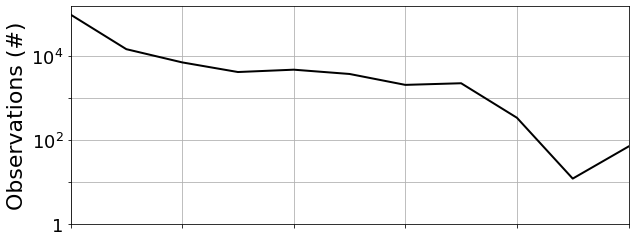

In [21]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(np.arange(0,1.1,0.1), n_fcf, 'k', linewidth = 2, label = '# Obs.')
ax.set_yscale('log')
ax.set_yticks([1,10,100,1000,10000])
ax.set_yticklabels([1,'','$10^2$','','$10^4$'])
ax.tick_params(axis='y', labelsize=18)
ax.set_xlim([0,1])
ax.set_xticklabels([]);
ax.grid()
ax.set_ylabel('Observations (#)', fontsize = 22)
plt.savefig('panels/fcf_n.png', dpi = 300, bbox_inches = 'tight')

In [22]:
def reproject_m(df_src, df_dest):
    df_src = df_src.rename({'lat': 'y', 'lon': 'x'}).transpose('y', 'x')
    df_dest = df_dest.rename({'lat': 'y', 'lon': 'x'}).transpose('y', 'x')
    df_src.rio.write_crs("EPSG:4326", inplace = True)
    df_dest.rio.write_crs("EPSG:4326", inplace = True)
    df_out = df_src.rio.reproject_match(df_dest, resampling = Resampling.average)
    return df_out.rename({'y': 'lat', 'x': 'lon'})

In [16]:
static_var = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon')
files = glob('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/*0301.nc')

snowcover = xr.open_dataset(files[0])

for f in files[1:]:
    sc_new = xr.open_dataset(f)
    snowcover = xr.concat([snowcover, sc_new], dim = 'new')
    
snowcover = snowcover.mean(dim = 'new')
snowcover2 = reproject_m(snowcover, static_var)

In [17]:
sc_np = snowcover2.sc.values
fcf = static_var.forest.values
grid = static_var.grid.values
fcf[(sc_np<0.25)|(grid==0)] = np.nan

In [24]:
all_sc = np.copy(fcf)
all_sc[~np.isnan(fcf)]=1

fcf_forested = np.copy(all_sc)
fcf_forested[fcf<10] = np.nan
np.nansum(fcf_forested)/np.nansum(all_sc)

0.67697835

In [25]:
files

['/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20180301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20160301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20190301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20200301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20220301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20210301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20230301.nc',
 '/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/snowcover/sc_mean/sc_mean_20170301.nc']

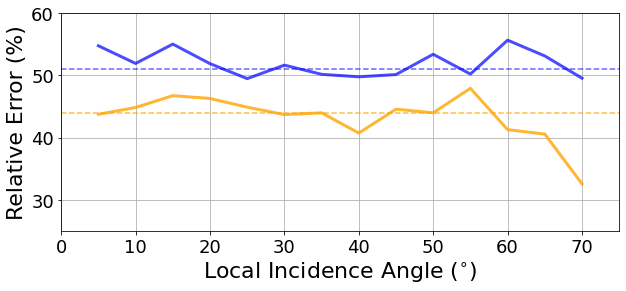

In [62]:
fig, ax = plt.subplots(1,1, figsize = (10,4))

ax.plot(np.arange(5,75,5), re_ml_lia*100, color = 'orange',alpha = 0.8, linewidth = 3, label = 'ML')
ax.plot(np.arange(5,75,5), re_hans_lia*100, color = 'blue',alpha = 0.7, linewidth = 3, label = 'Empirical')
ax.set_ylim([25,60])
ax.set_xlim([0,75])
ax.set_yticks([30,40,50,60])
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('Local Incidence Angle ($^{\circ}$)', fontsize = 22)
ax.plot([0,6.25], [re_ml, re_ml], '--', color = 'orange',alpha = 0.7)
ax.plot([0,6.25], [re_hans, re_hans], '--', color = 'blue',alpha = 0.6)
ax.grid()
ax.set_ylabel('Relative Error (%)', fontsize = 22)
ax.plot([0,100], [100*re_ml2, 100*re_ml2], '--', color = 'orange',alpha = 0.7)
ax.plot([0,100], [100*re_hans2, 100*re_hans2], '--', color = 'blue',alpha = 0.6)
plt.savefig('panels/lia_bin.png', dpi = 300, bbox_inches = 'tight')

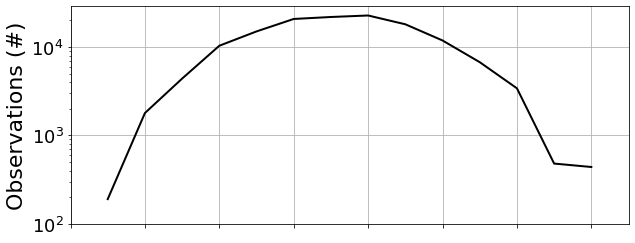

In [24]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(np.arange(5,75,5), n_lia, 'k', linewidth = 2, label = '# Obs.')
ax.set_yscale('log')
ax.set_yticks([100,1000,10000])
ax.set_xlim([0,75])
ax.set_yticklabels(['$10^2$','$10^3$','$10^4$'])
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels([]);
ax.grid()
ax.set_ylabel('Observations (#)', fontsize = 22)
plt.savefig('panels/lia_n.png', dpi = 300, bbox_inches = 'tight')

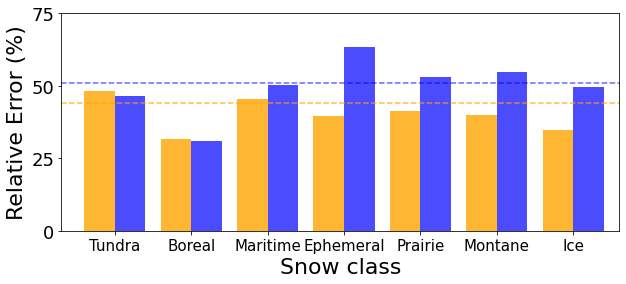

In [63]:
fig, ax = plt.subplots(1,1, figsize = (10,4))

ax.bar([0,1,2,3,4,5,6], re_ml_sc*100, width = 0.4, color = 'orange', alpha = 0.8)
ax.bar([0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4], re_hans_sc*100, width = 0.4, color = 'blue', alpha = 0.7)
ax.set_xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2])
ax.set_xticklabels(['Tundra','Boreal','Maritime','Ephemeral','Prairie','Montane', 'Ice'])
ax.set_ylim([0, 75])
ax.set_xlim([-0.5,6.8])
ax.set_yticks([0,25,50,75])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlabel('Snow class', fontsize = 22)
ax.plot([-0.5,6.8], [re_ml2*100, re_ml2*100], '--', color = 'orange',alpha = 0.7)
ax.plot([-0.5,6.8], [re_hans2*100, re_hans2*100], '--', color = 'blue',alpha = 0.6)
ax.set_ylabel('Relative Error (%)', fontsize = 22)

plt.savefig('panels/snowclass_bin.png', dpi = 300, bbox_inches = 'tight')

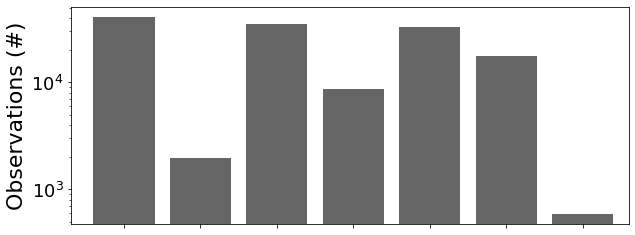

In [26]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.bar([0.2,1.2,2.2,3.2,4.2,5.2,6.2], n_sc, color = 'k', alpha = 0.6)
#ax.set_yticks([20000,40000])
ax.set_yscale('log')
#ax.set_yticks([100,1000,10000])
ax.tick_params(axis='y', labelsize=18)
ax.set_xlim([-0.5,6.8])
ax.set_xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2])
ax.set_xticklabels([])
ax.set_ylabel('Observations (#)', fontsize = 22)
plt.savefig('panels/snowclass_n.png', dpi = 300, bbox_inches = 'tight')